# I. General process

## 1.Read file

In [1]:
'''
hue_test = 'https://raw.githubusercontent.com/Nguyen-Van-Truong-Khoa/PTTK_FINAL_PROJECT/main/rainfall_hue_2020_2022.csv'
import pandas as pd
dataset1 = pd.read_csv(hue_test, index_col = "date", parse_dates= True).asfreq("D")
dataset1

dataset2 = pd.read_csv(hue_test, index_col = "date", parse_dates= True).asfreq("D")
dataset2
'''

'\nhue_test = \'https://raw.githubusercontent.com/Nguyen-Van-Truong-Khoa/Group-12---ProjectCS4273.N12.1/main/hue_test.csv\'\nimport pandas as pd\ndataset1 = pd.read_csv(hue_test, index_col = "date", parse_dates= True).asfreq("D")\ndataset1\n\ndataset2 = pd.read_csv(hue_test, index_col = "date", parse_dates= True).asfreq("D")\ndataset2\n'

In [2]:
import pandas as pd

dataset1 = pd.read_csv("../Dataset/rainfall_hue_2020_2022.csv", index_col = "date", parse_dates= True).asfreq("D")
dataset1

dataset2 = pd.read_csv("../Dataset/rainfall_hue_2020_2022.csv", index_col = "date", parse_dates= True).asfreq("D")
dataset2

,rain,Unnamed: 2
date,,
2020-01-01,19.0,NaN
2020-01-02,26.9,NaN
2020-01-03,3.5,NaN
2020-01-04,0.7,NaN
2020-01-05,0.2,NaN
...,...,...
2022-12-25,0.0,NaN
2022-12-26,0.0,NaN
2022-12-27,2.2,NaN


## 2. Choose needed column

In [3]:
# Take needed column
df1 = dataset1[['rain']]
df1

df2  = dataset2[['rain']]
df2

,rain
date,
2020-01-01,19.0
2020-01-02,26.9
2020-01-03,3.5
2020-01-04,0.7
2020-01-05,0.2
...,...
2022-12-25,0.0
2022-12-26,0.0
2022-12-27,2.2


## Split data

In [4]:
ratio_train = 0.7
train = df2[:int(len(df2)*ratio_train)]
test = df2[int(len(df2)*ratio_train):]
print(train)
print(test)
train1 = df2[:int(len(df2)*ratio_train)]
test1 = df2[int(len(df2)*ratio_train):]
print(train1)
print(test1)

            rain
date            
2020-01-01  19.0
2020-01-02  26.9
2020-01-03   3.5
2020-01-04   0.7
2020-01-05   0.2
...          ...
2022-01-30   0.0
2022-01-31   1.0
2022-02-01   0.0
2022-02-02   0.7
2022-02-03   1.2

[765 rows x 1 columns]
            rain
date            
2022-02-04   4.0
2022-02-05  11.4
2022-02-06   2.0
2022-02-07   0.0
2022-02-08   0.0
...          ...
2022-12-25   0.0
2022-12-26   0.0
2022-12-27   2.2
2022-12-28   5.0
2022-12-29  26.1

[329 rows x 1 columns]
            rain
date            
2020-01-01  19.0
2020-01-02  26.9
2020-01-03   3.5
2020-01-04   0.7
2020-01-05   0.2
...          ...
2022-01-30   0.0
2022-01-31   1.0
2022-02-01   0.0
2022-02-02   0.7
2022-02-03   1.2

[765 rows x 1 columns]
            rain
date            
2022-02-04   4.0
2022-02-05  11.4
2022-02-06   2.0
2022-02-07   0.0
2022-02-08   0.0
...          ...
2022-12-25   0.0
2022-12-26   0.0
2022-12-27   2.2
2022-12-28   5.0
2022-12-29  26.1

[329 rows x 1 columns]


In [5]:
#Check Nan value
import numpy as np
print(df2[np.isnan(df2["rain"])].index)

DatetimeIndex([], dtype='datetime64[ns]', name='date', freq='D')


## 3. Visualizing dataset

<function matplotlib.pyplot.show(close=None, block=None)>

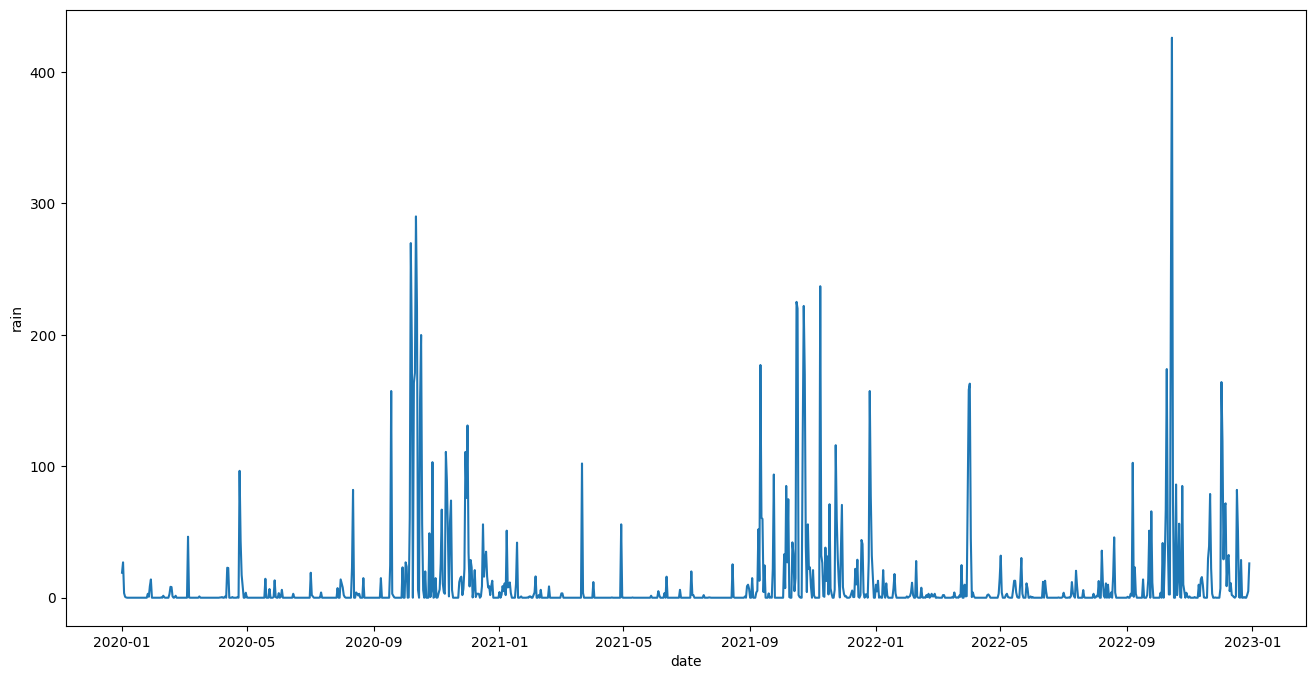

In [6]:
#import lib
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
# labeling
plt.xlabel('date')
plt.ylabel('rain')

# plotting
plt.plot(df2)
plt.show

# III. ARIMA

## 2. Use ADF test to test the train data is stationary or not

In [7]:
#import library
from statsmodels.tsa.stattools import adfuller
#data
X = train.rain
#calculate ADF value of organize series
result = adfuller(X)
print ("Original")
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
 
#calculate ADF value of first different series
X1 = train.rain.diff()
result1 = adfuller(X1[1:])
print ("1st order differencing")
print('ADF Statistic: %f' % result1[0])
print('p-value: %f' % result1[1])
print('Critical Values:')
for key, value in result1[4].items():
	print('\t%s: %.3f' % (key, value))

Original
ADF Statistic: -7.137092
p-value: 0.000000
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569
1st order differencing
ADF Statistic: -10.865325
p-value: 0.000000
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569


## 3. Choosing p, d, q for ARIMA model by using auto ARIMA

In [8]:
#import lib
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

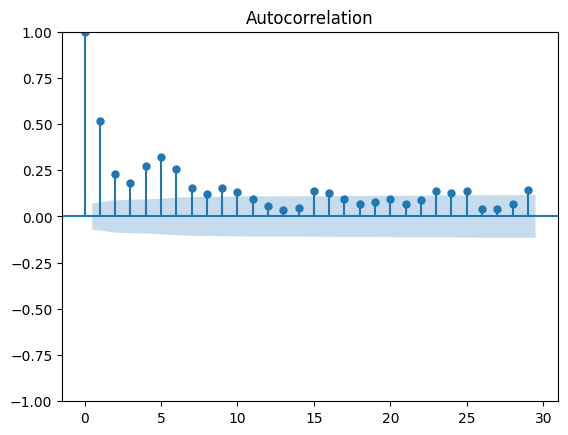

In [9]:
#Plot
plot_acf(train.rain.dropna())
plt.show()

c:\Users\khoan\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


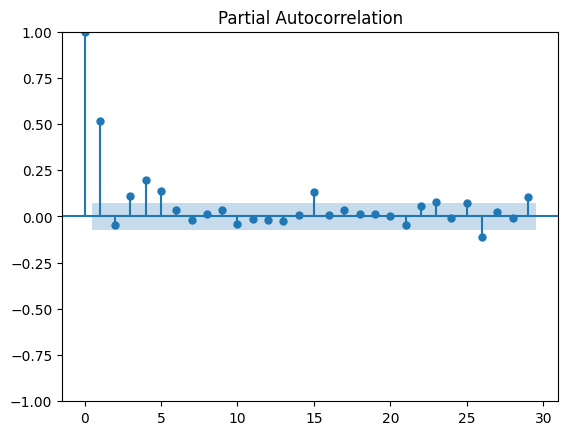

In [10]:
plot_pacf(train.rain.dropna())
plt.show()

In [11]:
#import lib
from pmdarima.arima import auto_arima

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [12]:
#stepwise auto arima
stepwise_fit = auto_arima(train.rain, start_p=0, start_q=0,
                        test='adf',
                          max_p=35, max_q=35,
                          start_P=0, seasonal=False,
                          d=None, D=0, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=7610.242, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=7326.498, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=7379.271, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=7328.207, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=7327.975, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=7328.988, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=7306.869, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=7540.787, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=7307.072, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=7306.220, Time=0.18 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=7337.755, Time=0.17 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=7307.693, Time=0.36 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=7278.931, Time=0.42 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=7310.312, Time=0.27 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  765
Model:               SARIMAX(1, 0, 2)   Log Likelihood               -3634.465
Date:                Thu, 05 Jan 2023   AIC                           7278.931
Time:                        02:37:06   BIC                           7302.130
Sample:                    01-01-2020   HQIC                          7287.862
                         - 02-03-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.7156      0.615      1.164      0.244      -0.489       1.921
ar.L1          0.9305      0.020     45.836      0.000       0.891       0.970
ma.L1         -0.4408      0.029    -15.458      0.000      -0.497      -0.385
ma.L2         -0.3050      0.020    -15.111      0.000      -0.345      -0.265
sigma2       783.1812     17.430     44.934      0.000     749.020     817.343
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):             23190.77
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):              11.92   Skew:                             3.95
Prob(H) (two-sided):                  0.00   Kurtosis:                        28.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## 4. Split data into train and test data

In [13]:
train = df2[:int(len(df2)*ratio_train)]
test = df2[int(len(df2)*ratio_train):]
print(train)
print(test)

            rain
date            
2020-01-01  19.0
2020-01-02  26.9
2020-01-03   3.5
2020-01-04   0.7
2020-01-05   0.2
...          ...
2022-01-30   0.0
2022-01-31   1.0
2022-02-01   0.0
2022-02-02   0.7
2022-02-03   1.2

[765 rows x 1 columns]
            rain
date            
2022-02-04   4.0
2022-02-05  11.4
2022-02-06   2.0
2022-02-07   0.0
2022-02-08   0.0
...          ...
2022-12-25   0.0
2022-12-26   0.0
2022-12-27   2.2
2022-12-28   5.0
2022-12-29  26.1

[329 rows x 1 columns]


## 5. Bulit ARIMA model

In [14]:
# importing the ARIMA model
from statsmodels.tsa.arima.model import ARIMA

# ( arima p d q )
model = ARIMA(train.rain, order=(1,0,2))

# Training arima modeling 
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   rain   No. Observations:                  765
Model:                 ARIMA(1, 0, 2)   Log Likelihood               -3634.466
Date:                Thu, 05 Jan 2023   AIC                           7278.932
Time:                        02:37:07   BIC                           7302.131
Sample:                    01-01-2020   HQIC                          7287.863
                         - 02-03-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.4181      7.402      1.407      0.159      -4.090      24.926
ar.L1          0.9305      0.020     45.816      0.000       0.891       0.970
ma.L1         -0.4408      0.029    -15.453      0.0

## 5. Predict of test data

In [15]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
predictions = model_fit.predict(start=start, end=end, dynamic=False, typ='levels').rename('ARIMA Predictions')
predictions 

2022-02-04     3.530821
2022-02-05     4.701267
2022-02-06     5.098827
2022-02-07     5.468740
2022-02-08     5.812928
                ...    
2022-12-25    10.418091
2022-12-26    10.418091
2022-12-27    10.418091
2022-12-28    10.418091
2022-12-29    10.418091
Freq: D, Name: ARIMA Predictions, Length: 329, dtype: float64

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Rain')]

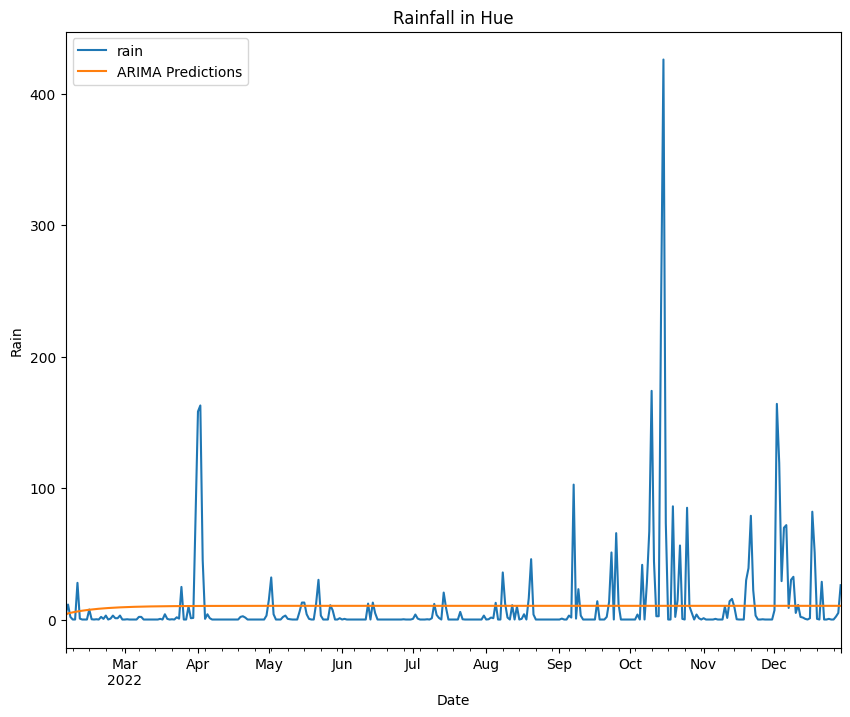

In [16]:
# Plot predictions against known values
title = 'Rainfall in Hue'
ylabel='Rain'
xlabel='Date' # we don't really need a label here

ax = test['rain'].plot(legend=True,figsize=(10,8),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
#ax.yaxis.set_major_formatter(formatter)

## Full data

In [17]:
model = ARIMA(df2['rain'],order=(5,0,0))
results = model.fit()
fcast = results.predict(len(df2),len(df2)+11,typ='levels').rename('ARIMA(1,1,1) Forecast')

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Rain')]

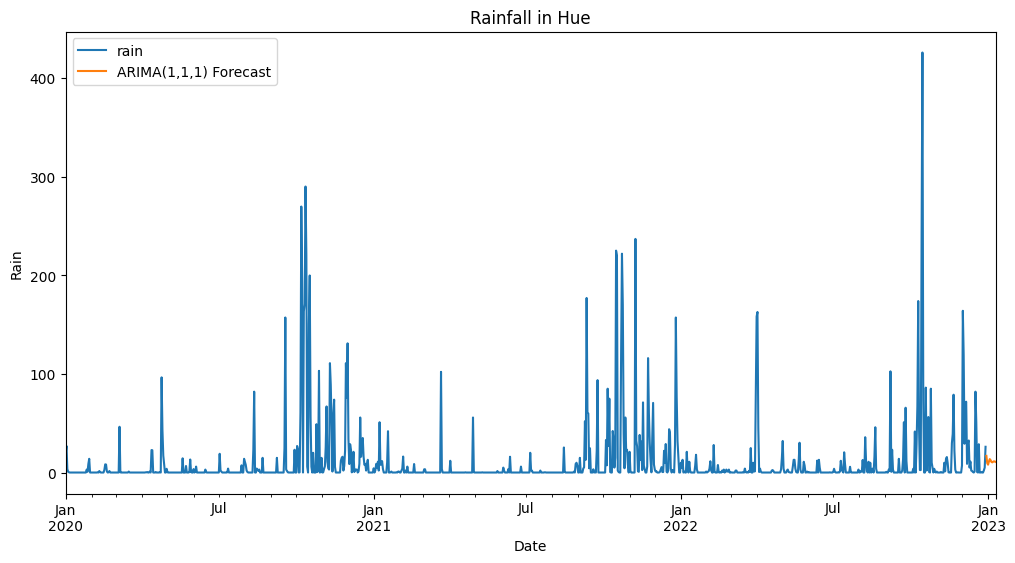

In [18]:
# Plot predictions against known values
title = 'Rainfall in Hue'
ylabel='Rain'
xlabel='Date'

ax = df2['rain'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
#ax.yaxis.set_major_formatter(formatter)

## Result evaluation

In [19]:
actual = test.values
predict =predictions.values

In [20]:
#MAE
MAE = 0
for i in range(len(actual)):
    MAE = MAE + abs(actual[i] - predict[i])
MAE = MAE / len(actual)
print(MAE)

[15.77421343]


In [21]:
#RMSE
RMSE = 0
for i in range(len(actual)):
    RMSE = RMSE + (actual[i] - predict[i])**2
RMSE = np.sqrt(RMSE / len(actual))
print(RMSE)

[35.8730283]


## 6. predicted value from 1/1/2023 to 30/1/2023

In [22]:
start= "01-01-2023"
end= "30-01-2023"
predictions = model_fit.predict(start=start, end=end, dynamic=False, typ='levels')
predictions

2023-01-01    10.418091
2023-01-02    10.418091
2023-01-03    10.418091
2023-01-04    10.418091
2023-01-05    10.418091
2023-01-06    10.418091
2023-01-07    10.418091
2023-01-08    10.418091
2023-01-09    10.418091
2023-01-10    10.418091
2023-01-11    10.418091
2023-01-12    10.418091
2023-01-13    10.418091
2023-01-14    10.418091
2023-01-15    10.418091
2023-01-16    10.418091
2023-01-17    10.418091
2023-01-18    10.418091
2023-01-19    10.418091
2023-01-20    10.418091
2023-01-21    10.418091
2023-01-22    10.418091
2023-01-23    10.418091
2023-01-24    10.418091
2023-01-25    10.418091
2023-01-26    10.418091
2023-01-27    10.418091
2023-01-28    10.418091
2023-01-29    10.418091
2023-01-30    10.418091
Freq: D, Name: predicted_mean, dtype: float64